In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import modules.rcnn.net as net
import modules.rcnn.shapes as shapes
import modules.rcnn.box as box

In [2]:
H = 3
W = 3
h = H-1
w = W-1

gt_box = np.array([
    [0.166667, 0.166667, 0.1, 0.1],
    [0.5, 0.5, 0.3333, 0.3333]
])

In [3]:
anchor_boxes = np.array([
    [0.1,0.1],
    [0.09,0.09],
    [0.3333,0.3333]
])

K = anchor_boxes.shape[0]

anchors = np.zeros((H,W,K,4))

for i in range(H):
    for j in range(W):
        anchors[i,j,:,0] = (j+0.5)/W
        anchors[i,j,:,1] = (i+0.5)/H
        anchors[i,j,:,2] = anchor_boxes[:,0]
        anchors[i,j,:,3] = anchor_boxes[:,1]
        
anchors_1d = anchors.reshape((-1,4))
print(anchors_1d)

[[0.16666667 0.16666667 0.1        0.1       ]
 [0.16666667 0.16666667 0.09       0.09      ]
 [0.16666667 0.16666667 0.3333     0.3333    ]
 [0.5        0.16666667 0.1        0.1       ]
 [0.5        0.16666667 0.09       0.09      ]
 [0.5        0.16666667 0.3333     0.3333    ]
 [0.83333333 0.16666667 0.1        0.1       ]
 [0.83333333 0.16666667 0.09       0.09      ]
 [0.83333333 0.16666667 0.3333     0.3333    ]
 [0.16666667 0.5        0.1        0.1       ]
 [0.16666667 0.5        0.09       0.09      ]
 [0.16666667 0.5        0.3333     0.3333    ]
 [0.5        0.5        0.1        0.1       ]
 [0.5        0.5        0.09       0.09      ]
 [0.5        0.5        0.3333     0.3333    ]
 [0.83333333 0.5        0.1        0.1       ]
 [0.83333333 0.5        0.09       0.09      ]
 [0.83333333 0.5        0.3333     0.3333    ]
 [0.16666667 0.83333333 0.1        0.1       ]
 [0.16666667 0.83333333 0.09       0.09      ]
 [0.16666667 0.83333333 0.3333     0.3333    ]
 [0.5        

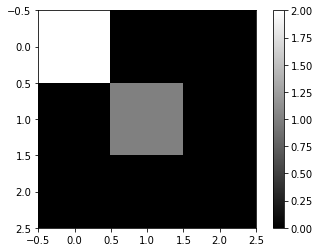

0


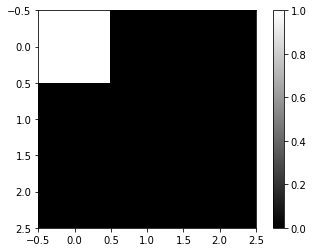

1


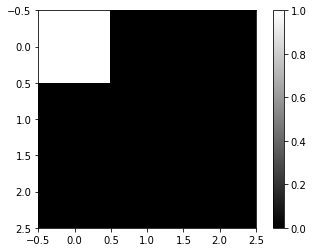

2


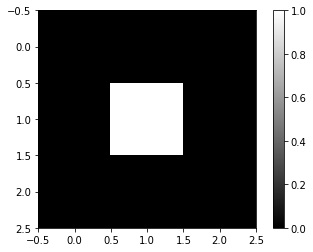

weights
0


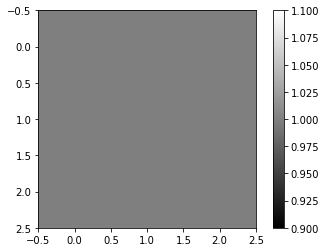

1


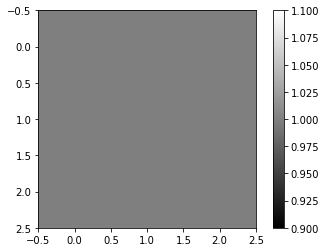

2


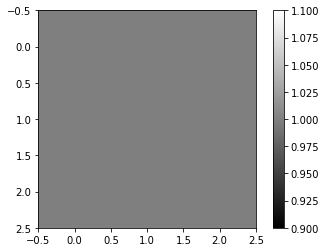

In [4]:
gt_t, gt_matched, gt_labels, gt_weights =\
    box.create_box_gt(anchors_1d, gt_box)

lab = gt_labels.reshape((H,W,K))
weights = gt_weights.reshape((H,W,K))

plt.figure()
plt.imshow(np.sum(lab, axis=2), cmap='gray')
plt.colorbar()
plt.show()

for i in range(K):
    print(i)
    plt.figure()
    plt.imshow(lab[:,:,i], cmap='gray')
    plt.colorbar()
    plt.show()
    
print("weights")
for i in range(K):
    print(i)
    plt.figure()
    plt.imshow(weights[:,:,i], cmap='gray')
    plt.colorbar()
    plt.show()

In [5]:
print(np.sum(lab))
for i in range(K):
    print(i, np.sum(lab[:,:,i]))
    print(np.amax(lab[:,:,i]))

1.0
0 0.0
0.0
1 0.0
0.0
2 1.0
1.0
